In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_colwidth", None)
#pd.set_option("display.max_rows", None)
import logging
from time import time
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import numpy as np
import os
import re
import csv
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from gensim.models import Word2Vec
import multiprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
import ruptures as rpt
import matplotlib.pyplot as plt
from math import sqrt
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import itertools
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\national_details.pkl", "rb") as f:
    data = pickle.load(f)

In [6]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_national_daily_details.pkl", "rb") as f:
    data2 = pickle.load(f)

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
data

,date,total_tweets,total_likes,total_retweets,total_replies,all_likes_avg,all_retweets_avg,all_replies_avg,all_neg_total,all_neg_likes,all_neg_retweets,all_neg_replies,all_neg_likes_avg,all_neg_retweets_avg,all_neg_replies_avg,conv_total_tweets,conv_total_likes,conv_total_retweets,conv_total_replies,conv_likes_avg,conv_retweets_avg,conv_replies_avg,conv_neg_total,conv_neg_likes,conv_neg_retweets,conv_neg_replies,conv_neg_likes_avg,conv_neg_retweets_avg,conv_neg_replies_avg,rel_total_tweets,rel_total_likes,rel_total_retweets,rel_total_replies,rel_likes_avg,rel_retweets_avg,rel_replies_avg,rel_neg_total,rel_neg_likes,rel_neg_retweets,rel_neg_replies,rel_neg_likes_avg,rel_neg_retweets_avg,rel_neg_replies_avg,m_total_tweets,m_total_likes,m_total_retweets,m_total_replies,m_likes_avg,m_retweets_avg,m_replies_avg,m_neg_total,m_neg_likes,m_neg_retweets,m_neg_replies,m_neg_likes_avg,m_neg_retweets_avg,m_neg_replies_avg
0,2020-01-22,20704,204977.0,57636.0,14966.0,9.900357,2.783810,0.722855,1292,6961.0,3894.0,707.0,5.387771,3.013932,0.547214,2353,49181.0,14970.0,4268.0,20.901402,6.362091,1.813855,479,3320.0,1347.0,355.0,6.931106,2.812109,0.741127,1281,8367.0,3387.0,785.0,6.531616,2.644028,0.612802,373,3120.0,1313.0,267.0,8.364611,3.520107,0.715818,511,5099.0,2254.0,398.0,9.978474,4.410959,0.778865,179,2692.0,1164.0,190.0,15.039106,6.502793,1.061453
1,2020-01-23,24086,256220.0,81484.0,17584.0,10.637715,3.383044,0.730051,1531,14926.0,5753.0,1006.0,9.749184,3.757675,0.657087,2446,44688.0,14131.0,2390.0,18.269828,5.777187,0.977105,557,11792.0,4031.0,697.0,21.170557,7.236984,1.251346,1453,23985.0,9945.0,1281.0,16.507226,6.844460,0.881624,426,10667.0,3880.0,614.0,25.039906,9.107981,1.441315,666,7922.0,3614.0,469.0,11.894895,5.426426,0.704204,230,5848.0,2364.0,270.0,25.426087,10.278261,1.173913
2,2020-01-24,23208,284502.0,77485.0,19352.0,12.258790,3.338719,0.833850,1622,13484.0,6295.0,1700.0,8.313194,3.881011,1.048089,2334,28758.0,7087.0,2593.0,12.321337,3.036418,1.110968,523,1945.0,638.0,297.0,3.718929,1.219885,0.567878,1303,24171.0,6236.0,2089.0,18.550269,4.785879,1.603223,396,1789.0,583.0,242.0,4.517677,1.472222,0.611111,519,19143.0,4983.0,1612.0,36.884393,9.601156,3.105973,189,1089.0,301.0,163.0,5.761905,1.592593,0.862434
3,2020-01-25,23429,419645.0,112852.0,31723.0,17.911349,4.816766,1.354006,1805,89823.0,37181.0,7886.0,49.763435,20.598892,4.368975,2697,134723.0,37482.0,14405.0,49.952911,13.897664,5.341120,623,36929.0,16876.0,4861.0,59.276083,27.088283,7.802568,1480,36181.0,17779.0,1847.0,24.446622,12.012838,1.247973,446,15167.0,10886.0,821.0,34.006726,24.408072,1.840807,582,12858.0,7761.0,916.0,22.092784,13.335052,1.573883,210,7126.0,5220.0,510.0,33.933333,24.857143,2.428571
4,2020-01-26,29321,435941.0,136706.0,30771.0,14.867876,4.662392,1.049453,1774,52183.0,17468.0,6102.0,29.415445,9.846674,3.439684,3971,77740.0,23672.0,6733.0,19.576933,5.961219,1.695543,705,21420.0,5784.0,2153.0,30.382979,8.204255,3.053901,2662,47270.0,16493.0,3969.0,17.757325,6.195718,1.490984,545,12201.0,3712.0,1139.0,22.387156,6.811009,2.089908,745,23348.0,7485.0,2812.0,31.339597,10.046980,3.774497,250,11258.0,3326.0,1048.0,45.032000,13.304000,4.192000
5,2020-01-27,24212,321410.0,88256.0,20009.0,13.274822,3.645135,0.826408,1766,60851.0,21325.0,5764.0,34.456965,12.075311,3.263873,2652,59716.0,16869.0,3496.0,22.517345,6.360860,1.318250,648,25552.0,8454.0,1494.0,39.432099,13.046296,2.305556,1540,44950.0,13697.0,2553.0,29.188312,8.894156,1.657792,467,23561.0,7512.0,1369.0,50.451820,16.085653,2.931478,672,25614.0,8761.0,1389.0,38.116071,13.037202,2.066964,212,9046.0,4317.0,547.0,42.669811,20.363208,2.580189
6,2020-01-28,24032,256954.0,62045.0,17173.0,10.692160,2.581766,0.714589,1898,15899.0,7037.0,1162.0,8.376712,3.707587,0.612223,2559,39241.0,9364.0,3558.0,15.334506,3.659242,1.390387,552,2881.0,988.0,344.0,5.219203,1.789855,0.623188,1330,8190.0,3095.0,790.0,6.157895,2.327068,0.593985,406,2628.0,930.0,293.0,6.472906,2.290640,0.721675,556,5008.0,2137.0,413.0,9.007194,3.84

In [7]:
data2

,date,all_tweets,all_likes,all_retweets,all_replies,all_neg,all_neg_likes,all_neg_retweets,all_neg_replies,covid_tweets,covid_likes,covid_retweets,covid_replies,covid_neg,covid_neg_likes,covid_neg_retweets,covid_neg_replies,tablighi_tweets,tablighi_likes,tablighi_retweets,tablighi_replies,tablighi_neg,tablighi_neg_likes,tablighi_neg_retweets,tablighi_neg_replies,muslim_tweets,muslim_likes,muslim_retweets,muslim_replies,muslim_neg,muslim_neg_likes,muslim_neg_retweets,muslim_neg_replies,muslim + tablighi_tweets,muslim + tablighi_likes,muslim + tablighi_retweets,muslim + tablighi_replies,muslim + tablighi_neg,muslim + tablighi_neg_likes,muslim + tablighi_neg_retweets,muslim + tablighi_neg_replies,muslim + covid_tweets,muslim + covid_likes,muslim + covid_retweets,muslim + covid_replies,muslim + covid_neg,muslim + covid_neg_likes,muslim + covid_neg_retweets,muslim + covid_neg_replies
0,2020-01-22,20704,204977.0,57636.0,14966.0,1292,6961.0,3894.0,707.0,143,833.0,484.0,124.0,9,16.0,13.0,1.0,1,8.0,5.0,0.0,0,0.0,0.0,0.0,700,6292.0,2698.0,449.0,246,2968.0,1273.0,184.0,1,8.0,5.0,0.0,0,0.0,0.0,0.0,5,564.0,390.0,78.0,2,9.0,8.0,0.0
1,2020-01-23,24086,256220.0,81484.0,17584.0,1531,14926.0,5753.0,1006.0,190,4086.0,1931.0,202.0,11,2417.0,943.0,116.0,6,2455.0,935.0,121.0,1,2408.0,927.0,115.0,1606,26904.0,15483.0,960.0,345,6531.0,2615.0,304.0,1,2408.0,927.0,115.0,1,2408.0,927.0,115.0,12,2414.0,928.0,115.0,2,2408.0,927.0,115.0
2,2020-01-24,23208,284502.0,77485.0,19352.0,1623,13485.0,6295.0,1700.0,212,897.0,204.0,65.0,8,3.0,2.0,0.0,1,1.0,0.0,1.0,0,0.0,0.0,0.0,805,21668.0,5422.0,1719.0,275,1513.0,423.0,184.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,8,5.0,3.0,2.0,3,0.0,0.0,0.0
3,2020-01-25,23429,419645.0,112852.0,31723.0,1805,89823.0,37181.0,7886.0,251,895.0,226.0,98.0,15,72.0,18.0,12.0,3,2.0,0.0,0.0,1,2.0,0.0,0.0,823,28895.0,16929.0,1691.0,321,19216.0,12535.0,951.0,1,2.0,0.0,0.0,1,2.0,0.0,0.0,13,28.0,12.0,5.0,2,2.0,0.0,0.0
4,2020-01-26,29321,435941.0,136706.0,30771.0,1774,52183.0,17468.0,6102.0,234,9638.0,2352.0,1064.0,20,8886.0,2043.0,961.0,12,115.0,42.0,9.0,2,91.0,36.0,5.0,970,31177.0,10452.0,3134.0,340,14003.0,4667.0,1149.0,3,94.0,38.0,5.0,2,91.0,36.0,5.0,15,121.0,79.0,6.0,9,92.0,36.0,6.0
5,2020-01-27,24212,321410.0,88256.0,20009.0,1766,60851.0,21325.0,5764.0,258,2991.0,779.0,284.0,17,28.0,21.0,5.0,12,141.0,56.0,3.0,2,0.0,0.0,1.0,944,24814.0,8950.0,1466.0,348,9995.0,4591.0,599.0,2,132.0,53.0,1.0,1,0.0,0.0,1.0,14,1633.0,245.0,149.0,5,3.0,1.0,2.0
6,2020-01-28,24032,256954.0,62045.0,17173.0,1898,15899.0,7037.0,1162.0,378,1770.0,798.0,171.0,20,92.0,27.0,14.0,6,22.0,10.0,1.0,2,0.0,0.0,0.0,858,8749.0,3047.0,586.0,322,2174.0,754.0,180.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,11,39.0,14.0,2.0,5,31.0,8.0,1.0
7,2020-01-29,26264,330627.0,80893.0,19498.0,2112,10460.0,4439.0,1076.0,413,10746.0,1744.0,373.0,19,54.0,10.0,10.0,15,457.0,306.0,14.0,4,5.0,0.0,0.0,753,28700.0,11722.0,1998.0,260,4043.0,1987.0,389.0,4,445.0,301.0,13.0,3,4.0,0.0,0.0,19,898.0,541.0,90.0,7,4.0,0.0,0.0
8,2020-01-30,25180,300837.0,82881.0,20991.0,2142,24683.0,9878.0,1621.0,498,2581.0,920.0,296.0,44,574.0,263.0,57.0,8,20.0,4.0,8.0,1,1.0,0.0,0.0,1202,24715.0,8002.0,3213.0,499,3455.0,1548.0,323.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,33,439.0,226.0,53.0,19,377.0,204.0,47.0
9,2020-01-31,24917,260495.0,61698.0,15104.0,1878,15519.0,5206.0,1615.0,559,2571.0,737.0,160.0,35,18.0,3.0,1.0,3,0.0,0.0,0.0,2,0.0,0.0,0.0,1039,8740.0,2035.0,597.0,399,1283.0,570.0,186.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,26,125.0,46.0,5.0,9,2.0,0.0,0.0


In [8]:
#finding words related to elections and voting

In [9]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\wv_model.pkl", "rb") as f:
    wv_model = pickle.load(f)
wv = wv_model.wv

In [26]:
wv.most_similar(positive = ["legislative"], topn = 100)

[('assembly', 0.5157865285873413),
 ('parliamentary', 0.4792851507663727),
 ('legislature', 0.45283859968185425),
 ('parliment', 0.412409245967865),
 ('state', 0.4106948673725128),
 ('constituent', 0.4084402322769165),
 ('parliament', 0.40553978085517883),
 ('council', 0.4032404124736786),
 ('administrative', 0.3961613178253174),
 ('rajyasabha', 0.38431429862976074),
 ('vidhan', 0.3808137774467468),
 ('unopposed', 0.3744038939476013),
 ('cabinet', 0.37403738498687744),
 ('sabha', 0.36795923113822937),
 ('provincial', 0.36667561531066895),
 ('ls', 0.3605634570121765),
 ('unsc', 0.35949578881263733),
 ('governor', 0.35881441831588745),
 ('loksabha', 0.35416263341903687),
 ('parl', 0.3532794415950775),
 ('ncte', 0.35001519322395325),
 ('cm', 0.349857896566391),
 ('government', 0.34937360882759094),
 ('assy', 0.34776654839515686),
 ('elections', 0.34386131167411804),
 ('governing', 0.34350085258483887),
 ('parliaments', 0.33774691820144653),
 ('tpcc', 0.33406558632850647),
 ('legislation',

In [27]:
terms = ["elections", "election", "vidhan", "sabha", "vote", "voting", "vidhansabha", "legislative"]

In [28]:
election_terms = []
for term in terms:
    similar_list = wv.most_similar(positive = [term], topn = 100)
    for tup in similar_list:
        if tup[1] >= 0.5:
            election_terms.append(tup[0])

In [29]:
for term in terms:
    election_terms.append(term)

In [30]:
election_terms = list(set(election_terms))

In [31]:
election_terms.remove("loksabha")

In [32]:
election_terms

['elections',
 'voters',
 'vidhansabha',
 'poll',
 'votes',
 'vote',
 'vidhan',
 'voting',
 'elex',
 'sabha',
 'assembly',
 'polls',
 'legislative',
 'voted',
 'election']

In [27]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\election_terms.pkl", "wb") as f:
    pickle.dump(election_terms, f)

In [23]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\election_terms.pkl", "rb") as f:
    election_terms = pickle.load(f)

In [26]:
election_terms

['elections',
 'voters',
 'vidhansabha',
 'poll',
 'votes',
 'vote',
 'vidhan',
 'voting',
 'elex',
 'sabha',
 'polls',
 'legislative',
 'voted',
 'election']

In [25]:
election_terms.remove("assembly")

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "rb") as f:
    covid_terms = pickle.load(f)

In [3]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_muslim_terms.pkl", "rb") as f:
    muslim_terms = pickle.load(f)

In [36]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_tabligh_terms.pkl", "rb") as f:
    tabligh_terms = pickle.load(f)

In [37]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\ramzan_terms.pkl", "rb") as f:
    ramzan_terms = pickle.load(f)

In [38]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\riot_terms.pkl", "rb") as f:
    riot_terms = pickle.load(f)

In [16]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\caa_terms.pkl", "rb") as f:
    caa_terms = pickle.load(f)

In [21]:
caa_terms

['protestors',
 'saheen',
 'protesting',
 'agitation',
 'caa',
 'shahin',
 'npr',
 'sahinbag',
 'cca',
 'shaheenbagh',
 'anticaa',
 'nrc',
 'dharna',
 'protesters',
 'shaeen',
 'shaheenbag',
 'shahinbagh',
 'demonstrations',
 'sahin',
 'protests']

In [22]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\caa_terms", "wb") as f:
    pickle.dump(caa_terms, f)

In [48]:
#calculating all tweets that contain caa terms

In [28]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
                if any([term in df.at[i, "hashtag"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} september_caa_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [29]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, caa_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.56 mins
Arunachal finished
time taken: 0.04 mins
Assam finished
time taken: 0.28 mins
Bengal finished
time taken: 0.73 mins
Bihar finished
time taken: 0.32 mins
Chandigarh finished
time taken: 0.19 mins
Chattisgarh finished
time taken: 0.34 mins
Delhi finished
time taken: 2.81 mins
Goa finished
time taken: 0.06 mins
Gujarat finished
time taken: 0.84 mins
Haryana finished
time taken: 0.18 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.14 mins
Karnataka finished
time taken: 1.87 mins
Kerala finished
time taken: 0.3 mins
Maharashtra finished
time taken: 3.01 mins
Manipur finished
time taken: 0.02 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.23 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.33 mins
Punjab finished
time taken: 0.19 mins
Rajasthan finished
time taken: 0.5 mins
Sikkim finished
time taken: 0.01 mins
Telangana finishe

In [65]:
#calculating all tweets that contain riot terms

In [67]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
                if any([term in df.at[i, "hashtag"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} september_riot_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [68]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, riot_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.51 mins
Arunachal finished
time taken: 0.03 mins
Assam finished
time taken: 0.22 mins
Bengal finished
time taken: 0.6 mins
Bihar finished
time taken: 0.25 mins
Chandigarh finished
time taken: 0.15 mins
Chattisgarh finished
time taken: 0.27 mins
Delhi finished
time taken: 2.49 mins
Goa finished
time taken: 0.08 mins
Gujarat finished
time taken: 0.72 mins
Haryana finished
time taken: 0.18 mins
Himachal finished
time taken: 0.03 mins
Jharkhand finished
time taken: 0.14 mins
Karnataka finished
time taken: 1.58 mins
Kerala finished
time taken: 0.27 mins
Maharashtra finished
time taken: 2.58 mins
Manipur finished
time taken: 0.05 mins
Meghalaya finished
time taken: 0.03 mins
Mizoram finished
time taken: 0.03 mins
MP finished
time taken: 0.22 mins
Nagaland finished
time taken: 0.03 mins
Odisha finished
time taken: 0.3 mins
Punjab finished
time taken: 0.18 mins
Rajasthan finished
time taken: 0.46 mins
Sikkim finished
time taken: 0.03 mins
Telangana finishe

In [69]:
#finding tweets about ramzan

In [70]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
                if any([term in df.at[i, "hashtag"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} september_ramzan_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [71]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, ramzan_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.43 mins
Arunachal finished
time taken: 0.03 mins
Assam finished
time taken: 0.18 mins
Bengal finished
time taken: 0.57 mins
Bihar finished
time taken: 0.23 mins
Chandigarh finished
time taken: 0.14 mins
Chattisgarh finished
time taken: 0.23 mins
Delhi finished
time taken: 2.0 mins
Goa finished
time taken: 0.07 mins
Gujarat finished
time taken: 0.7 mins
Haryana finished
time taken: 0.15 mins
Himachal finished
time taken: 0.03 mins
Jharkhand finished
time taken: 0.13 mins
Karnataka finished
time taken: 1.43 mins
Kerala finished
time taken: 0.23 mins
Maharashtra finished
time taken: 2.19 mins
Manipur finished
time taken: 0.05 mins
Meghalaya finished
time taken: 0.04 mins
Mizoram finished
time taken: 0.03 mins
MP finished
time taken: 0.23 mins
Nagaland finished
time taken: 0.03 mins
Odisha finished
time taken: 0.3 mins
Punjab finished
time taken: 0.2 mins
Rajasthan finished
time taken: 0.41 mins
Sikkim finished
time taken: 0.02 mins
Telangana finished


In [72]:
#finding tweets about elections

In [30]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
                if any([term in df.at[i, "hashtag"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} september_election_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [31]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, election_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.39 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.17 mins
Bengal finished
time taken: 0.48 mins
Bihar finished
time taken: 0.21 mins
Chandigarh finished
time taken: 0.12 mins
Chattisgarh finished
time taken: 0.23 mins
Delhi finished
time taken: 1.97 mins
Goa finished
time taken: 0.04 mins
Gujarat finished
time taken: 0.59 mins
Haryana finished
time taken: 0.13 mins
Himachal finished
time taken: 0.0 mins
Jharkhand finished
time taken: 0.1 mins
Karnataka finished
time taken: 1.32 mins
Kerala finished
time taken: 0.22 mins
Maharashtra finished
time taken: 2.11 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.0 mins
MP finished
time taken: 0.16 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.23 mins
Punjab finished
time taken: 0.14 mins
Rajasthan finished
time taken: 0.35 mins
Sikkim finished
time taken: 0.01 mins
Telangana finished

In [4]:
#calculating convos that contain muslim terms

In [7]:
class find_convo_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.convo_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        convo_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                if any([term in df.at[i, "hashtag"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
        return list(set(convo_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} september_muslim_convo_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.convo_ids, f)

In [8]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_convo_ids(folder_name, muslim_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 2.05 mins
Arunachal finished
time taken: 0.07 mins
Assam finished
time taken: 0.95 mins
Bengal finished
time taken: 2.73 mins
Bihar finished
time taken: 1.35 mins
Chandigarh finished
time taken: 0.87 mins
Chattisgarh finished
time taken: 1.37 mins
Delhi finished
time taken: 10.96 mins
Goa finished
time taken: 0.29 mins
Gujarat finished
time taken: 3.53 mins
Haryana finished
time taken: 0.92 mins
Himachal finished
time taken: 0.08 mins
Jharkhand finished
time taken: 0.71 mins
Karnataka finished
time taken: 7.41 mins
Kerala finished
time taken: 1.18 mins
Maharashtra finished
time taken: 11.49 mins
Manipur finished
time taken: 0.11 mins
Meghalaya finished
time taken: 0.09 mins
Mizoram finished
time taken: 0.06 mins
MP finished
time taken: 0.94 mins
Nagaland finished
time taken: 0.08 mins
Odisha finished
time taken: 1.32 mins
Punjab finished
time taken: 0.78 mins
Rajasthan finished
time taken: 2.04 mins
Sikkim finished
time taken: 0.08 mins
Telangana fin

In [9]:
#creating stats for states

In [4]:
class stats_for_states:
    
    def __init__(self, folder):
        self.folder = folder
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.covid_ids = self.load_covid_ids()
        self.tablighi_ids = self.load_tablighi_ids()
        self.muslim_ids = self.load_muslim_ids()
        self.muslim_convos = self.load_muslim_convos()
        self.caa_ids = self.load_caa_ids()
        self.riot_ids = self.load_riot_ids()
        self.ramzan_ids = self.load_ramzan_ids()
        self.election_ids = self.load_election_ids()
        self.stats = self.create_stats()
        self.save_output = self.save_output()
        
        
        
    def load_covid_ids(self):
        with open(os.path.join(self.folder, "{} final_covid_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_tablighi_ids(self):
        with open(os.path.join(self.folder, "{} final_tablighi_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_muslim_ids(self):
        with open(os.path.join(self.folder, "{} final_muslim_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_muslim_convos(self):
        with open(os.path.join(self.folder, "{} september_muslim_convo_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_caa_ids(self):
        with open(os.path.join(self.folder, "{} september_caa_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_riot_ids(self):
        with open(os.path.join(self.folder, "{} september_riot_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_ramzan_ids(self):
        with open(os.path.join(self.folder, "{} september_ramzan_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_election_ids(self):
        with open(os.path.join(self.folder, "{} september_election_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    @staticmethod
    def find_negative_count(df):
        _grouped = df.groupby("polarity")["id"].count()
        return _grouped[0]
    
    def create_stats(self):
        folder_details  = []
        for file in self.file_list:
            file_details = {}
            file_details["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            file_details["all_tweets"] = df.shape[0]
            try:
                file_details["all_neg"] = self.find_negative_count(df)
            except:
                file_details["all_neg"] = 0
            muslim_convo_df = df.where(df["conversation_id"].isin(self.muslim_convos)).dropna(subset = ["conversation_id"])
            file_details["muslim_convos"] = muslim_convo_df.shape[0]
            try:
                file_details["muslim_convo_neg"] = self.find_negative_count(muslim_convo_df)
            except:
                file_details["muslim_convo_neg"] = 0
            muslim_df = df.where(df["id"].isin(self.muslim_ids)).dropna(subset = ["id"])
            file_details["muslim_tweets"] = muslim_df.shape[0]
            try:
                file_details["muslim_neg"] = self.find_negative_count(muslim_df)
            except:
                file_details["muslim_neg"] = 0
            covid_df = df.where(df["id"].isin(self.covid_ids)).dropna(subset = ["id"])
            file_details["covid_tweets"] = covid_df.shape[0]
            try:
                file_details["covid_neg"] = self.find_negative_count(covid_df)
            except:
                file_details["covid_neg"] = 0
            tablighi_df = df.where(df["id"].isin(self.tablighi_ids)).dropna(subset = ["id"])
            file_details["tablighi_tweets"] = tablighi_df.shape[0]
            try:
                file_details["tablighi_neg"] = self.find_negative_count(tablighi_df)
            except:
                file_details["tablighi_neg"] = 0
            caa_df = df.where(df["id"].isin(self.caa_ids)).dropna(subset = ["id"])
            file_details["caa_tweets"] = caa_df.shape[0]
            try:
                file_details["caa_neg"] = self.find_negative_count(caa_df)
            except:
                file_details["caa_neg"] = 0
            riot_df = df.where(df["id"].isin(self.riot_ids)).dropna(subset = ["id"])
            file_details["riot_tweets"] = riot_df.shape[0]
            try:
                file_details["riot_neg"] = self.find_negative_count(riot_df)
            except:
                file_details["riot_neg"] = 0
            ramzan_df = df.where(df["id"].isin(self.ramzan_ids)).dropna(subset = ["id"])
            file_details["ramzan_tweets"] = ramzan_df.shape[0]
            try:
                file_details["ramzan_neg"] = self.find_negative_count(ramzan_df)
            except:
                file_details["ramzan_neg"] = 0
            election_df = df.where(df["id"].isin(self.election_ids)).dropna(subset = ["id"])
            file_details["election_tweets"] = election_df.shape[0]
            try:
                file_details["election_neg"] = self.find_negative_count(election_df)
            except:
                file_details["election_neg"] = 0
            folder_details.append(file_details)
        folder_df = pd.DataFrame.from_dict(folder_details)
        return folder_df
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} september_daily_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.stats, f)

In [5]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    stats_for_states(folder_name)
    print("{} completed".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("program completed.")
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh completed
time taken: 0.09 mins
Arunachal completed
time taken: 0.07 mins
Assam completed
time taken: 0.08 mins
Bengal completed
time taken: 0.1 mins
Bihar completed
time taken: 0.08 mins
Chandigarh completed
time taken: 0.07 mins
Chattisgarh completed
time taken: 0.08 mins
Delhi completed
time taken: 0.2 mins
Goa completed
time taken: 0.07 mins
Gujarat completed
time taken: 0.1 mins
Haryana completed
time taken: 0.07 mins
Himachal completed
time taken: 0.06 mins
Jharkhand completed
time taken: 0.07 mins
Karnataka completed
time taken: 0.14 mins
Kerala completed
time taken: 0.07 mins
Maharashtra completed
time taken: 0.21 mins
Manipur completed
time taken: 0.07 mins
Meghalaya completed
time taken: 0.07 mins
Mizoram completed
time taken: 0.06 mins
MP completed
time taken: 0.07 mins
Nagaland completed
time taken: 0.06 mins
Odisha completed
time taken: 0.08 mins
Punjab completed
time taken: 0.07 mins
Rajasthan completed
time taken: 0.09 mins
Sikkim completed
time taken: 0.0

In [6]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Andhra_Pradesh\\Andhra_Pradesh september_daily_details.pkl", "rb") as f:
    test = pickle.load(f)

In [7]:
test

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,tablighi_neg,caa_tweets,caa_neg,riot_tweets,riot_neg,ramzan_tweets,ramzan_neg,election_tweets,election_neg
0,2020-01-22,802,39,19,4,14,3,3,0,0,0,14,1,3,1,0,0,14,1
1,2020-01-23,880,33,26,11,22,11,2,0,0,0,19,6,5,1,0,0,13,0
2,2020-01-24,874,33,18,4,13,4,4,0,0,0,12,3,1,0,0,0,19,1
3,2020-01-25,812,36,18,4,14,3,7,0,0,0,24,4,3,1,0,0,27,0
4,2020-01-26,936,36,25,9,23,9,3,0,1,0,31,4,14,1,0,0,11,0
5,2020-01-27,800,34,17,4,12,4,2,0,0,0,28,3,1,0,0,0,21,2
6,2020-01-28,812,47,25,9,20,7,8,1,0,0,32,5,1,1,0,0,16,2
7,2020-01-29,797,39,14,6,13,6,7,0,1,0,17,2,1,1,0,0,8,0
8,2020-01-30,771,42,38,14,28,11,6,0,0,0,25,5,3,0,0,0,13,1
9,2020-01-31,691,37,26,11,20,9,15,0,0,0,13,2,5,0,0,0,10,1


In [8]:
stats_to_track = [column for column in test.columns]

In [9]:
class create_national_stats:
    
    def __init__(self, date, stats_to_track, \
                 folder_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
                                "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
                                "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", \
                                "Rajasthan", "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]):
        self.date = date
        self.folder_list = folder_list
        self.stats_to_track = stats_to_track[1:]
        self.stats = self.create_daily_stats()
        
        
    def create_daily_stats(self):
        daily_stats = {}
        for _stat in self.stats_to_track:
            daily_stats.setdefault(_stat, 0)
        for folder in self.folder_list:
            wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
            _name = wd + "august cleaned " + folder
            with open(os.path.join(_name, "{} september_daily_details.pkl".format(folder)), "rb") as f:
                df = pickle.load(f)
            dates_list = df["date"].tolist()
            if self.date in dates_list:
                i = dates_list.index(self.date)
                for _stat in self.stats_to_track:
                    daily_stats[_stat] += df.at[i, _stat]
            else:
                pass
        return daily_stats

In [10]:
dates = pd.date_range(start = "2020-01-22", end = "2020-05-30", periods = 130)
period = []
for _date in dates:
    period.append(str(_date.date()))
national_stats = []
for _period in period:
    national_daily_stats = {}
    national_daily_stats["date"] = _period
    stats = create_national_stats(_period, stats_to_track)
    for _column in stats_to_track[1:]:
        national_daily_stats[_column] = stats.stats[_column]
    national_stats.append(national_daily_stats)
national_df = pd.DataFrame.from_dict(national_stats)

In [33]:
national_df

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,tablighi_neg,caa_tweets,caa_neg,riot_tweets,riot_neg,ramzan_tweets,ramzan_neg,election_tweets,election_neg,covid_dummy,tablighi_dummy,caa_dummy,riot_dummy,ramzan_dummy,election_dummy,muslim_convo_neg_share,muslim_tweets_neg_share,neg_muslim_convo_share,neg_muslim_tweets_share
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,20704,1292,1066,298,700,246,143,9,1,0,849,171,71,20,6,1,523,42,0.006048,0.000472,0.566756,0.040711,0.004295,0.156026,0.230650,0.190402,0.279550,0.351429
2020-01-23,2020-01-23,24086,1531,2025,422,1606,345,190,11,6,1,878,185,156,20,3,0,648,67,0.008036,0.002832,0.586115,0.089450,0.002147,0.193317,0.275637,0.225343,0.208395,0.214819
2020-01-24,2020-01-24,23208,1623,1185,332,805,275,212,8,1,0,827,177,86,22,12,0,553,63,0.008967,0.000472,0.552069,0.049312,0.008590,0.164976,0.204559,0.169439,0.280169,0.341615
2020-01-25,2020-01-25,23429,1805,1376,414,823,321,251,15,3,1,969,238,107,30,5,0,661,60,0.010616,0.001416,0.646862,0.061353,0.003579,0.197196,0.229363,0.177839,0.300872,0.390036
2020-01-26,2020-01-26,29321,1774,1549,445,970,340,234,20,12,2,1048,179,217,42,1,0,462,46,0.009897,0.005663,0.699599,0.124427,0.000716,0.137828,0.250846,0.191657,0.287282,0.350515
2020-01-27,2020-01-27,24212,1766,1438,445,944,348,258,17,12,2,1157,262,119,41,2,0,618,80,0.010912,0.005663,0.772363,0.068234,0.001432,0.184368,0.251982,0.197055,0.309458,0.368644
2020-01-28,2020-01-28,24032,1898,1368,408,858,322,378,20,6,2,939,233,123,41,3,0,832,100,0.015988,0.002832,0.626836,0.070528,0.002147,0.248210,0.214963,0.169652,0.298246,0.375291
2020-01-29,2020-01-29,26264,2112,1309,359,753,260,413,19,15,4,992,215,89,23,1,0,647,57,0.017468,0.007079,0.662216,0.051032,0.000716,0.193019,0.169981,0.123106,0.274255,0.345286
2020-01-30,2020-01-30,25180,2142,1719,579,1202,499,498,44,8,1,1116,271,124,37,6,0,631,74,0.021063,0.003775,0.744993,0.071101,0.004295,0.188246,0.270308,0.232960,0.336824,0.415141


In [29]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_final_data.pkl", "wb") as f:
    pickle.dump(national_df, f)

In [13]:
def covid_dummy(x):
    return x/national_df["covid_tweets"].max()

In [14]:
def tablighi_dummy(x):
    return x/national_df["tablighi_tweets"].max()

In [15]:
def caa_dummy(x):
    return x/national_df["caa_tweets"].max()

In [20]:
def riot_dummy(x):
    return x/national_df["riot_tweets"].max()

In [17]:
def ramzan_dummy(x):
    return x/national_df["ramzan_tweets"].max()

In [18]:
def election_dummy(x):
    return x/national_df["election_tweets"].max()

In [21]:
national_df["covid_dummy"] = national_df["covid_tweets"].apply(covid_dummy)
national_df["tablighi_dummy"] = national_df["tablighi_tweets"].apply(tablighi_dummy)
national_df["caa_dummy"] = national_df["caa_tweets"].apply(caa_dummy)
national_df["riot_dummy"] = national_df["riot_tweets"].apply(riot_dummy)
national_df["ramzan_dummy"] = national_df["ramzan_tweets"].apply(ramzan_dummy)
national_df["election_dummy"] = national_df["election_tweets"].apply(election_dummy)

In [23]:
national_df["muslim_convo_neg_share"] = national_df["muslim_convo_neg"]/national_df["all_neg"]
national_df["muslim_tweets_neg_share"] = national_df["muslim_neg"]/national_df["all_neg"]
national_df["neg_muslim_convo_share"] = national_df["muslim_convo_neg"]/national_df["muslim_convos"]
national_df["neg_muslim_tweets_share"] = national_df["muslim_neg"]/national_df["muslim_tweets"]

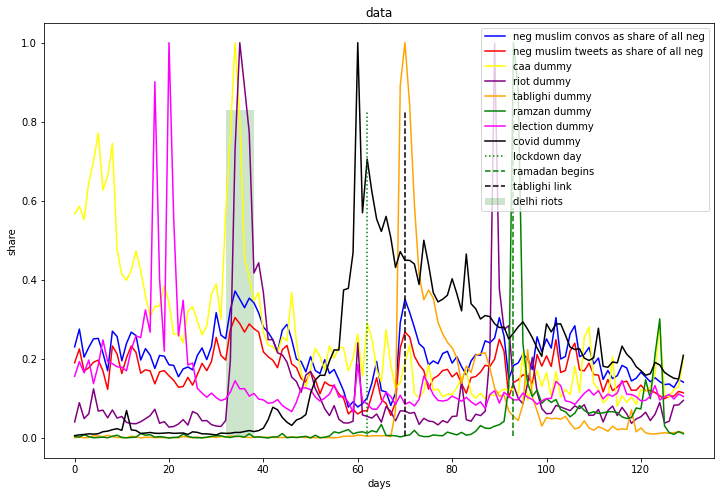

In [26]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(national_df["muslim_convo_neg_share"], color = "blue", label = "neg muslim convos as share of all neg")
ax.plot(national_df["muslim_tweets_neg_share"], color = "red", label = "neg muslim tweets as share of all neg")
ax.plot(national_df["caa_dummy"], color = "yellow", label = "caa dummy")
ax.plot(national_df["riot_dummy"], color = "purple", label = "riot dummy")
ax.plot(national_df["tablighi_dummy"], color = "orange", label = "tablighi dummy")
ax.plot(national_df["ramzan_dummy"], color = "green", label = "ramzan dummy")
ax.plot(national_df["election_dummy"], color = "magenta", label = "election dummy")
ax.plot(national_df["covid_dummy"], color = "black", label = "covid dummy")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "share", title = "data")
ax.legend()

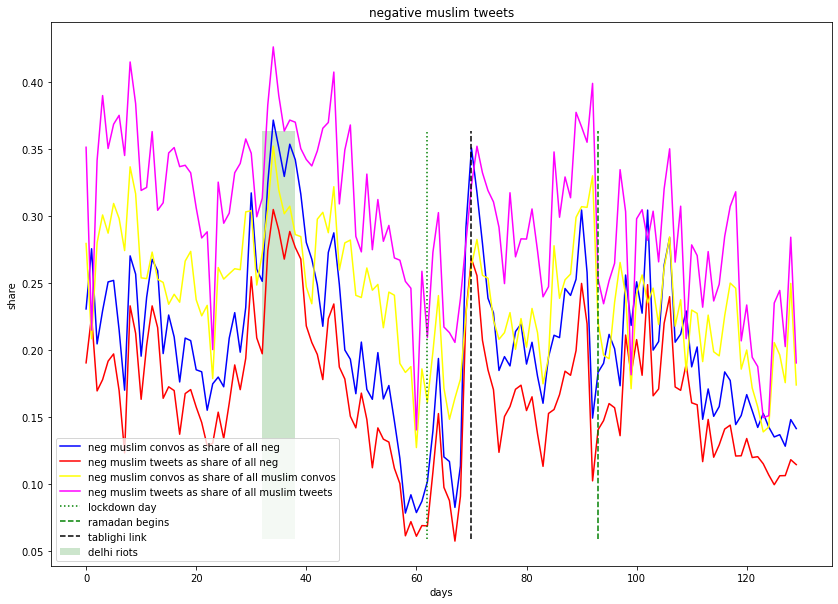

In [28]:
fig, ax = plt.subplots(figsize = (14, 10))
ax.plot(national_df["muslim_convo_neg_share"], color = "blue", label = "neg muslim convos as share of all neg")
ax.plot(national_df["muslim_tweets_neg_share"], color = "red", label = "neg muslim tweets as share of all neg")
ax.plot(national_df["neg_muslim_convo_share"], color = "yellow", label = "neg muslim convos as share of all muslim convos")
ax.plot(national_df["neg_muslim_tweets_share"], color = "magenta", label = "neg muslim tweets as share of all muslim tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "share", title = "negative muslim tweets")
ax.legend()

In [30]:
national_df["datetime"] = pd.to_datetime(national_df["date"])

In [32]:
national_df.set_index(keys = "datetime", inplace = True)

In [37]:
national_df.columns

Index(['date', 'all_tweets', 'all_neg', 'muslim_convos', 'muslim_convo_neg',
       'muslim_tweets', 'muslim_neg', 'covid_tweets', 'covid_neg',
       'tablighi_tweets', 'tablighi_neg', 'caa_tweets', 'caa_neg',
       'riot_tweets', 'riot_neg', 'ramzan_tweets', 'ramzan_neg',
       'election_tweets', 'election_neg', 'covid_dummy', 'tablighi_dummy',
       'caa_dummy', 'riot_dummy', 'ramzan_dummy', 'election_dummy',
       'muslim_convo_neg_share', 'muslim_tweets_neg_share',
       'neg_muslim_convo_share', 'neg_muslim_tweets_share'],
      dtype='object')

In [35]:
#trying with neg muslim tweets as share of all neg tweets as endog

In [36]:
#removing effects of dummies

In [40]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 0), "ct"]
exog = np.column_stack([national_df["riot_dummy"], national_df["caa_dummy"], national_df["election_dummy"], national_df["ramzan_dummy"], national_df["tablighi_dummy"], national_df["covid_dummy"]])
model = SARIMAX(endog = national_df["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 1000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.006725
         Iterations: 891
         Function evaluations: 1268


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 260.874
Date:                Wed, 14 Sep 2022   AIC                           -503.748
Time:                        13:19:34   BIC                           -477.941
Sample:                             0   HQIC                          -493.262
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1631      0.019      8.496      0.000       0.125       0.201
drift        -2.3e-05      0.000     -0.158      0.874      -0.000       0.000
x1             0.1116      0.017      6.740      0.000       0.079       0.144
x2             0.0658      0.030      2.211      0.027       0.007       0.124
x3            -0.0578      0.039     -1.487      0.137      -0.134       0.018
x4             0.0011      0.056      0.019      0.985      -0.109       0.112
x5             0.1615      0.040      3.989      0.000       0.082       0.241
x6            -0.1457      0.027     -5.411      0.000      -0.199      -0.093
sigma2         0.0011      0.000      8.074      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  27.80   Jarque-Bera (JB):                 8.97
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               2.02   Skew:                             0.58
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
resid = model_fit.resid

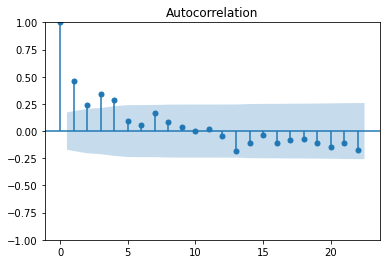

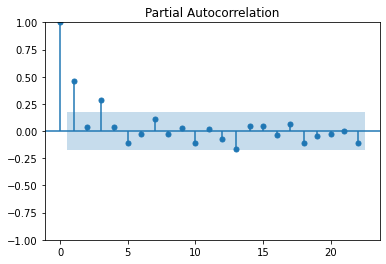

In [42]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [43]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.5359149592365586
2. P-value :  0.00042486192563395
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -2.5835695988591976
	 5% :  -1.9433083482922873
	 10% :  -1.6148845473038977
6. Reject Null of unit root


In [44]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.518912909778645
2. P-value :  0.007514449916258761
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -3.482920063655088
	 5% :  -2.884580323367261
	 10% :  -2.5790575441750883
6. Reject Null of unit root


In [45]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.488055527991097
2. P-value :  0.040687008667834965
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -4.031882284616695
	 5% :  -3.44564246299154
	 10% :  -3.147663331295954
6. Reject Null of unit root


In [46]:
dftest = adfuller(resid, autolag = "AIC", regression = "ctt")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.5814730886201622
2. P-value :  0.09368578637128766
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -4.464759530122052
	 5% :  -3.879723701412285
	 10% :  -3.5824349435530367
6. Cannot reject Null of unit root


In [47]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [48]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [49]:
#we consider our residuals to be stationary, so we minimize bic with d = 0 

In [50]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "ct", "t"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [51]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = exog = np.column_stack([national_df["riot_dummy"], national_df["caa_dummy"], national_df["election_dummy"], national_df["ramzan_dummy"], national_df["tablighi_dummy"], national_df["covid_dummy"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = national_df["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[8:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]-331.291
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]-331.291
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]-345.871
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]-411.491
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]-430.788
Model > [[(0, 0, 0), (1, 0, 2, 7), 'n']]-434.503
Model > [[(0, 0, 0), (2, 0, 0, 7), 'n']]-413.944
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-482.773
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-482.773
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-484.405
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-482.660
Model > [[(0, 0, 0), (2, 0, 1, 7), 'c']]-482.439
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]-400.743
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]-400.743
Model > [[(0, 0, 0), (0, 0, 2, 7), 't']]-400.314
Model > [[(0, 0, 0), (1, 0, 2, 7), 't']]-474.110
Model > [[(0, 0, 1), (0, 0, 0, 0), 'n']]-388.755
Model > [[(0, 0, 1), (0, 0, 0, 7), 'n']]-388.755
Model > [[(0, 0, 1), (0, 0, 2, 7), 'n']]-394.035
Model > [[(0, 0, 1), (1, 0, 0, 7), 'n']]-438.532
Model > [[(0, 0, 1),

In [52]:
rel_models = rel_models.sort(key = lambda tup: tup[1])
rel_models

In [56]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 0), "c"]
exog = np.column_stack([national_df["riot_dummy"], national_df["caa_dummy"], national_df["election_dummy"], national_df["ramzan_dummy"], national_df["tablighi_dummy"], national_df["covid_dummy"]])
model = SARIMAX(endog = national_df["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.157987
         Iterations: 1244
         Function evaluations: 1752


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 280.538
Date:                Wed, 14 Sep 2022   AIC                           -543.077
Time:                        16:13:10   BIC                           -517.269
Sample:                             0   HQIC                          -532.590
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0574      0.015      3.928      0.000       0.029       0.086
x1             0.0455      0.033      1.390      0.164      -0.019       0.110
x2             0.1050      0.033      3.183      0.001       0.040       0.170
x3            -0.0270      0.044     -0.612      0.541      -0.114       0.060
x4             0.0179      0.054      0.334      0.738      -0.087       0.123
x5             0.1556      0.079      1.962      0.050       0.000       0.311
x6            -0.1032      0.045     -2.298      0.022      -0.191      -0.015
ar.L1          0.6061      0.073      8.318      0.000       0.463       0.749
sigma2         0.0008   8.91e-05      8.744      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 8.42
Prob(Q):                              0.69   Prob(JB):                         0.01
Heteroskedasticity (H):               1.35   Skew:                             0.28
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_final_data.pkl", "rb") as f:
    data = pickle.load(f)

In [72]:
data

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,tablighi_neg,caa_tweets,caa_neg,riot_tweets,riot_neg,ramzan_tweets,ramzan_neg,election_tweets,election_neg,covid_dummy,tablighi_dummy,caa_dummy,riot_dummy,ramzan_dummy,election_dummy,muslim_convo_neg_share,muslim_tweets_neg_share,neg_muslim_convo_share,neg_muslim_tweets_share,lockdown_dummy
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,20704,1292,1066,298,700,246,143,9,1,0,849,171,71,20,6,1,523,42,0.006048,0.000472,0.566756,0.040711,0.004295,0.156026,0.230650,0.190402,0.279550,0.351429,0
2020-01-23,2020-01-23,24086,1531,2025,422,1606,345,190,11,6,1,878,185,156,20,3,0,648,67,0.008036,0.002832,0.586115,0.089450,0.002147,0.193317,0.275637,0.225343,0.208395,0.214819,0
2020-01-24,2020-01-24,23208,1623,1185,332,805,275,212,8,1,0,827,177,86,22,12,0,553,63,0.008967,0.000472,0.552069,0.049312,0.008590,0.164976,0.204559,0.169439,0.280169,0.341615,0
2020-01-25,2020-01-25,23429,1805,1376,414,823,321,251,15,3,1,969,238,107,30,5,0,661,60,0.010616,0.001416,0.646862,0.061353,0.003579,0.197196,0.229363,0.177839,0.300872,0.390036,0
2020-01-26,2020-01-26,29321,1774,1549,445,970,340,234,20,12,2,1048,179,217,42,1,0,462,46,0.009897,0.005663,0.699599,0.124427,0.000716,0.137828,0.250846,0.191657,0.287282,0.350515,0
2020-01-27,2020-01-27,24212,1766,1438,445,944,348,258,17,12,2,1157,262,119,41,2,0,618,80,0.010912,0.005663,0.772363,0.068234,0.001432,0.184368,0.251982,0.197055,0.309458,0.368644,0
2020-01-28,2020-01-28,24032,1898,1368,408,858,322,378,20,6,2,939,233,123,41,3,0,832,100,0.015988,0.002832,0.626836,0.070528,0.002147,0.248210,0.214963,0.169652,0.298246,0.375291,0
2020-01-29,2020-01-29,26264,2112,1309,359,753,260,413,19,15,4,992,215,89,23,1,0,647,57,0.017468,0.007079,0.662216,0.051032,0.000716,0.193019,0.169981,0.123106,0.274255,0.345286,0
2020-01-30,2020-01-30,25180,2142,1719,579,1202,499,498,44,8,1,1116,271,124,37,6,0,631,74,0.021063,0.003775,0.744993,0.071101,0.004295,0.188246,0.270308,0.232960,0.336824,0.415141,0


In [45]:
data["datetime"] = pd.to_datetime(data["date"])

In [43]:
def lockdown_dummy(x):
    if x >= "2020-03-25":
        return 1
    else:
        return 0

In [44]:
data["lockdown_dummy"] = data["date"].apply(lockdown_dummy)

In [46]:
event_data = data.loc[:79, :]

In [49]:
event_data

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,tablighi_neg,caa_tweets,caa_neg,riot_tweets,riot_neg,ramzan_tweets,ramzan_neg,election_tweets,election_neg,covid_dummy,tablighi_dummy,caa_dummy,riot_dummy,ramzan_dummy,election_dummy,muslim_convo_neg_share,muslim_tweets_neg_share,neg_muslim_convo_share,neg_muslim_tweets_share,lockdown_dummy
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,20704,1292,1066,298,700,246,143,9,1,0,849,171,71,20,6,1,523,42,0.006048,0.000472,0.566756,0.040711,0.004295,0.156026,0.230650,0.190402,0.279550,0.351429,0
2020-01-23,2020-01-23,24086,1531,2025,422,1606,345,190,11,6,1,878,185,156,20,3,0,648,67,0.008036,0.002832,0.586115,0.089450,0.002147,0.193317,0.275637,0.225343,0.208395,0.214819,0
2020-01-24,2020-01-24,23208,1623,1185,332,805,275,212,8,1,0,827,177,86,22,12,0,553,63,0.008967,0.000472,0.552069,0.049312,0.008590,0.164976,0.204559,0.169439,0.280169,0.341615,0
2020-01-25,2020-01-25,23429,1805,1376,414,823,321,251,15,3,1,969,238,107,30,5,0,661,60,0.010616,0.001416,0.646862,0.061353,0.003579,0.197196,0.229363,0.177839,0.300872,0.390036,0
2020-01-26,2020-01-26,29321,1774,1549,445,970,340,234,20,12,2,1048,179,217,42,1,0,462,46,0.009897,0.005663,0.699599,0.124427,0.000716,0.137828,0.250846,0.191657,0.287282,0.350515,0
2020-01-27,2020-01-27,24212,1766,1438,445,944,348,258,17,12,2,1157,262,119,41,2,0,618,80,0.010912,0.005663,0.772363,0.068234,0.001432,0.184368,0.251982,0.197055,0.309458,0.368644,0
2020-01-28,2020-01-28,24032,1898,1368,408,858,322,378,20,6,2,939,233,123,41,3,0,832,100,0.015988,0.002832,0.626836,0.070528,0.002147,0.248210,0.214963,0.169652,0.298246,0.375291,0
2020-01-29,2020-01-29,26264,2112,1309,359,753,260,413,19,15,4,992,215,89,23,1,0,647,57,0.017468,0.007079,0.662216,0.051032,0.000716,0.193019,0.169981,0.123106,0.274255,0.345286,0
2020-01-30,2020-01-30,25180,2142,1719,579,1202,499,498,44,8,1,1116,271,124,37,6,0,631,74,0.021063,0.003775,0.744993,0.071101,0.004295,0.188246,0.270308,0.232960,0.336824,0.415141,0


In [48]:
event_data.set_index(keys = "datetime", inplace = True)

In [71]:
data.set_index(keys = "datetime", inplace = True)

In [5]:
#exog = caa, riot, tablighi, ramzan, election, lockdown

In [14]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 0), "c"]
exog = np.column_stack([data["riot_dummy"], data["caa_dummy"], data["ramzan_dummy"], data["tablighi_dummy"], data["lockdown_dummy"]])
model = SARIMAX(endog = data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.834198
         Iterations: 624
         Function evaluations: 934


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 238.446
Date:                Wed, 14 Sep 2022   AIC                           -462.892
Time:                        21:16:10   BIC                           -442.819
Sample:                             0   HQIC                          -454.735
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1147      0.011     10.459      0.000       0.093       0.136
x1             0.1193      0.019      6.410      0.000       0.083       0.156
x2             0.1188      0.028      4.230      0.000       0.064       0.174
x3             0.0011      0.075      0.014      0.989      -0.145       0.147
x4             0.1158      0.053      2.186      0.029       0.012       0.220
x5            -0.0029      0.010     -0.275      0.783      -0.023       0.018
sigma2         0.0015      0.000      8.353      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  48.35   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.00   Prob(JB):                         0.65
Heteroskedasticity (H):               1.36   Skew:                            -0.06
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
resid = model_fit.resid

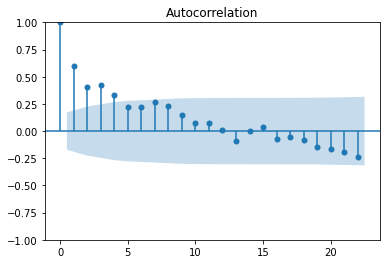

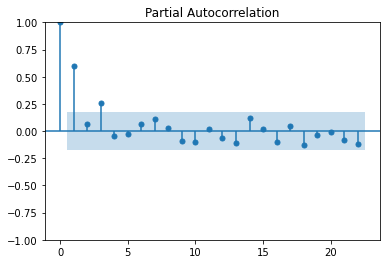

In [16]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [17]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.2101603694331686
2. P-value :  0.001331134106502827
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -2.5835695988591976
	 5% :  -1.9433083482922873
	 10% :  -1.6148845473038977
6. Reject Null of unit root


In [18]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.1959273180903423
2. P-value :  0.020221635667618258
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -3.482920063655088
	 5% :  -2.884580323367261
	 10% :  -2.5790575441750883
6. Reject Null of unit root


In [19]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.1867116568527796
2. P-value :  0.08708223854061875
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -4.031882284616695
	 5% :  -3.44564246299154
	 10% :  -3.147663331295954
6. Cannot reject Null of unit root


In [20]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [21]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


In [22]:
#d = 0 and trend = "c"

In [23]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["c"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [24]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = exog = np.column_stack([data["riot_dummy"], data["caa_dummy"], data["ramzan_dummy"], data["tablighi_dummy"], data["lockdown_dummy"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[5:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[7:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-442.819
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-442.819
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-452.044
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-451.827
Model > [[(0, 0, 0), (2, 0, 1, 7), 'c']]-458.160
Model > [[(0, 0, 1), (0, 0, 0, 0), 'c']]-488.989
Model > [[(0, 0, 1), (0, 0, 0, 7), 'c']]-488.989
Model > [[(0, 0, 1), (0, 0, 1, 7), 'c']]-490.438
Model > [[(0, 0, 1), (1, 0, 0, 7), 'c']]-490.410
Model > [[(0, 0, 2), (0, 0, 0, 0), 'c']]-491.770
Model > [[(0, 0, 2), (0, 0, 0, 7), 'c']]-491.770
Model > [[(0, 0, 2), (0, 0, 1, 7), 'c']]-491.958
Model > [[(0, 0, 2), (1, 0, 0, 7), 'c']]-491.699
Model > [[(0, 0, 3), (0, 0, 0, 0), 'c']]-492.812
Model > [[(0, 0, 3), (0, 0, 0, 7), 'c']]-492.812
Model > [[(0, 0, 3), (0, 0, 1, 7), 'c']]-490.752
Model > [[(1, 0, 0), (0, 0, 0, 0), 'c']]-512.351
Model > [[(1, 0, 0), (0, 0, 0, 7), 'c']]-512.351
Model > [[(1, 0, 0), (1, 0, 1, 7), 'c']]-509.416
time taken: 27.11 mins


In [25]:
rel_models = rel_models.sort(key = lambda tup: tup[1])
rel_models

In [26]:
rel_models

In [27]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 7), "c"]
exog = np.column_stack([data["riot_dummy"], data["caa_dummy"], data["ramzan_dummy"], data["tablighi_dummy"], data["lockdown_dummy"]])
model = SARIMAX(endog = data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.120351
         Iterations: 1054
         Function evaluations: 1529


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 275.646
Date:                Wed, 14 Sep 2022   AIC                           -535.291
Time:                        21:46:47   BIC                           -512.351
Sample:                             0   HQIC                          -525.970
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0325      0.010      3.203      0.001       0.013       0.052
x1             0.0183      0.026      0.694      0.488      -0.033       0.070
x2             0.1157      0.035      3.348      0.001       0.048       0.183
x3             0.0167      0.057      0.292      0.770      -0.095       0.129
x4             0.1402      0.092      1.530      0.126      -0.039       0.320
x5            -0.0003      0.022     -0.014      0.989      -0.043       0.042
ar.L1          0.7360      0.058     12.719      0.000       0.623       0.849
sigma2         0.0008      0.000      8.064      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 3.42
Prob(Q):                              0.50   Prob(JB):                         0.18
Heteroskedasticity (H):               1.14   Skew:                             0.11
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#checking with exog = riot, tablighi, caa and lockdown

In [112]:
data

,date,all_tweets,all_neg,muslim_convos,muslim_convo_neg,muslim_tweets,muslim_neg,covid_tweets,covid_neg,tablighi_tweets,tablighi_neg,caa_tweets,caa_neg,riot_tweets,riot_neg,ramzan_tweets,ramzan_neg,election_tweets,election_neg,covid_dummy,tablighi_dummy,caa_dummy,riot_dummy,ramzan_dummy,election_dummy,muslim_convo_neg_share,muslim_tweets_neg_share,neg_muslim_convo_share,neg_muslim_tweets_share,lockdown_dummy,scovid_tweets,scovid_dummy
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,20704,1292,1066,298,700,246,143,9,1,0,849,171,71,20,6,1,523,42,0.006048,0.000472,0.566756,0.040711,0.004295,0.156026,0.230650,0.190402,0.279550,0.351429,0,142,0.006010
2020-01-23,2020-01-23,24086,1531,2025,422,1606,345,190,11,6,1,878,185,156,20,3,0,648,67,0.008036,0.002832,0.586115,0.089450,0.002147,0.193317,0.275637,0.225343,0.208395,0.214819,0,184,0.007788
2020-01-24,2020-01-24,23208,1623,1185,332,805,275,212,8,1,0,827,177,86,22,12,0,553,63,0.008967,0.000472,0.552069,0.049312,0.008590,0.164976,0.204559,0.169439,0.280169,0.341615,0,211,0.008930
2020-01-25,2020-01-25,23429,1805,1376,414,823,321,251,15,3,1,969,238,107,30,5,0,661,60,0.010616,0.001416,0.646862,0.061353,0.003579,0.197196,0.229363,0.177839,0.300872,0.390036,0,248,0.010496
2020-01-26,2020-01-26,29321,1774,1549,445,970,340,234,20,12,2,1048,179,217,42,1,0,462,46,0.009897,0.005663,0.699599,0.124427,0.000716,0.137828,0.250846,0.191657,0.287282,0.350515,0,222,0.009396
2020-01-27,2020-01-27,24212,1766,1438,445,944,348,258,17,12,2,1157,262,119,41,2,0,618,80,0.010912,0.005663,0.772363,0.068234,0.001432,0.184368,0.251982,0.197055,0.309458,0.368644,0,246,0.010412
2020-01-28,2020-01-28,24032,1898,1368,408,858,322,378,20,6,2,939,233,123,41,3,0,832,100,0.015988,0.002832,0.626836,0.070528,0.002147,0.248210,0.214963,0.169652,0.298246,0.375291,0,372,0.015745
2020-01-29,2020-01-29,26264,2112,1309,359,753,260,413,19,15,4,992,215,89,23,1,0,647,57,0.017468,0.007079,0.662216,0.051032,0.000716,0.193019,0.169981,0.123106,0.274255,0.345286,0,398,0.016845
2020-01-30,2020-01-30,25180,2142,1719,579,1202,499,498,44,8,1,1116,271,124,37,6,0,631,74,0.021063,0.003775,0.744993,0.071101,0.004295,0.188246,0.270308,0.232960,0.336824,0.415141,0,490,0.020739


In [108]:
data["scovid_tweets"] = data["covid_tweets"] - data["tablighi_tweets"]

In [110]:
def scovid_dummy(x):
    return x/data["scovid_tweets"].max()

In [111]:
data["scovid_dummy"] = data["scovid_tweets"].apply(scovid_dummy)

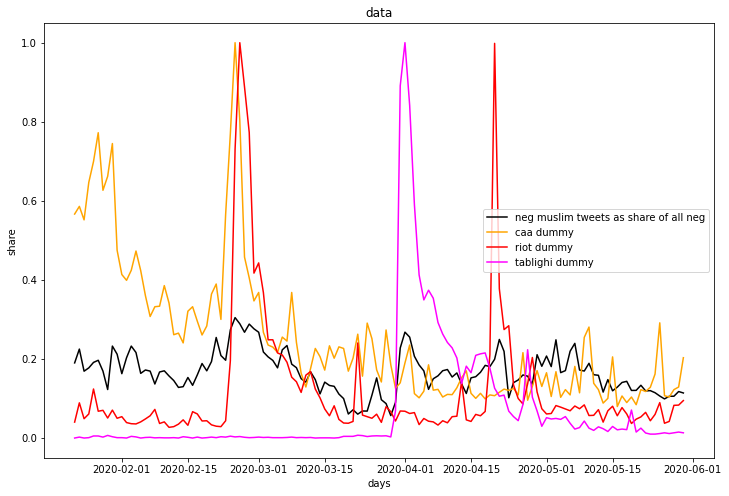

In [85]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(data["muslim_tweets_neg_share"], color = "black", label = "neg muslim tweets as share of all neg")
ax.plot(data["caa_dummy"], color = "orange", label = "caa dummy")
ax.plot(data["riot_dummy"], color = "red", label = "riot dummy")
ax.plot(data["tablighi_dummy"], color = "magenta", label= "tablighi dummy")
ax.set(xlabel = "days", ylabel = "share", title = "data")
ax.legend()

In [58]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), "ct"]
exog = np.column_stack([event_data["riot_dummy"], event_data["caa_dummy"], event_data["tablighi_dummy"], event_data["lockdown_dummy"]])
model = SARIMAX(endog = event_data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.930002
         Iterations: 562
         Function evaluations: 827


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                        SARIMAX   Log Likelihood                 154.400
Date:                Wed, 14 Sep 2022   AIC                           -294.800
Time:                        22:07:51   BIC                           -278.126
Sample:                             0   HQIC                          -288.115
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1771      0.021      8.264      0.000       0.135       0.219
drift         -0.0012      0.000     -3.643      0.000      -0.002      -0.001
x1             0.1774      0.024      7.473      0.000       0.131       0.224
x2             0.0307      0.032      0.958      0.338      -0.032       0.094
x3             0.1701      0.045      3.780      0.000       0.082       0.258
x4            -0.0036      0.017     -0.207      0.836      -0.038       0.031
sigma2         0.0012      0.000      6.328      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  27.27   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.00   Prob(JB):                         0.89
Heteroskedasticity (H):               1.49   Skew:                             0.11
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
resid = model_fit.resid

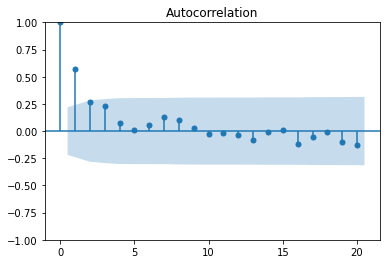

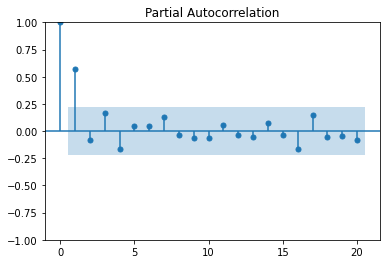

In [60]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [61]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.449597185878864
2. P-value :  1.1688417621498786e-05
3. num of lags :  0
4. num of observations used for ADF regression and critical value condition :  79
5. critical values : 
	 1% :  -2.5946224226886714
	 5% :  -1.9448758487665276
	 10% :  -1.6138413966846434
6. Reject Null of unit root


In [62]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.418662430217246
2. P-value :  0.0002750543432691339
3. num of lags :  0
4. num of observations used for ADF regression and critical value condition :  79
5. critical values : 
	 1% :  -3.5159766913976376
	 5% :  -2.898885703483903
	 10% :  -2.5866935058484217
6. Reject Null of unit root


In [63]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -4.38533152530494
2. P-value :  0.0023106648341508127
3. num of lags :  0
4. num of observations used for ADF regression and critical value condition :  79
5. critical values : 
	 1% :  -4.078193339938625
	 5% :  -3.467604557671908
	 10% :  -3.160453411494831
6. Reject Null of unit root


In [64]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [65]:
kpss_test = kpss(resid, regression = "ct")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


In [66]:
#minimizing bic with d = 0 and trend = "c", "ct"

In [67]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["c", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [68]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = exog = np.column_stack([event_data["riot_dummy"], event_data["caa_dummy"], event_data["tablighi_dummy"], event_data["lockdown_dummy"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = event_data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[4:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[5:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-271.483
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-271.483
Model > [[(0, 0, 0), (0, 0, 0, 0), 'ct']]-278.126
Model > [[(0, 0, 0), (0, 0, 0, 7), 'ct']]-278.126
Model > [[(0, 0, 0), (1, 0, 0, 7), 'ct']]-273.324
Model > [[(0, 0, 1), (0, 0, 0, 0), 'c']]-304.077
Model > [[(0, 0, 1), (0, 0, 0, 7), 'c']]-304.077
Model > [[(0, 0, 1), (0, 0, 0, 0), 'ct']]-307.615
Model > [[(0, 0, 1), (0, 0, 0, 7), 'ct']]-307.615
Model > [[(0, 0, 3), (0, 0, 0, 0), 'c']]-303.604
Model > [[(0, 0, 3), (0, 0, 0, 7), 'c']]-303.604
Model > [[(1, 0, 0), (0, 0, 0, 0), 'c']]-314.314
Model > [[(1, 0, 0), (0, 0, 0, 7), 'c']]-314.314
time taken: 36.78 mins


In [69]:
rel_models.sort(key = lambda tup : tup[1])
rel_models

[([(1, 0, 0), (0, 0, 0, 0), 'c'], -314.31440879160374),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -314.31440879160374),
 ([(0, 0, 1), (0, 0, 0, 0), 'ct'], -307.6147332894236),
 ([(0, 0, 1), (0, 0, 0, 7), 'ct'], -307.6147332894236),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], -304.07682610995033),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], -304.07682610995033),
 ([(0, 0, 3), (0, 0, 0, 0), 'c'], -303.60367168511664),
 ([(0, 0, 3), (0, 0, 0, 7), 'c'], -303.60367168511664),
 ([(0, 0, 0), (0, 0, 0, 0), 'ct'], -278.12610250789595),
 ([(0, 0, 0), (0, 0, 0, 7), 'ct'], -278.12610250789595),
 ([(0, 0, 0), (1, 0, 0, 7), 'ct'], -273.3236217790982),
 ([(0, 0, 0), (0, 0, 0, 0), 'c'], -271.48252720587675),
 ([(0, 0, 0), (0, 0, 0, 7), 'c'], -271.48252720587675)]

In [70]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 7), "c"]
exog = np.column_stack([event_data["riot_dummy"], event_data["caa_dummy"], event_data["tablighi_dummy"], event_data["lockdown_dummy"]])
model = SARIMAX(endog = event_data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.156179
         Iterations: 567
         Function evaluations: 852


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 172.494
Date:                Wed, 14 Sep 2022   AIC                           -330.989
Time:                        22:51:15   BIC                           -314.314
Sample:                             0   HQIC                          -324.303
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0276      0.011      2.435      0.015       0.005       0.050
x1             0.0525      0.058      0.906      0.365      -0.061       0.166
x2             0.0994      0.039      2.569      0.010       0.024       0.175
x3             0.1456      0.131      1.109      0.267      -0.112       0.403
x4             0.0040      0.032      0.124      0.901      -0.059       0.066
ar.L1          0.7750      0.075     10.403      0.000       0.629       0.921
sigma2         0.0008      0.000      5.423      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.61   Prob(JB):                         0.52
Heteroskedasticity (H):               0.82   Skew:                             0.29
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
#doing same for whole data

In [95]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 7), "c"]
exog = np.column_stack([data["riot_dummy"], data["caa_dummy"], data["tablighi_dummy"], data["lockdown_dummy"]])
model = SARIMAX(endog = data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -1.834194
         Iterations: 280
         Function evaluations: 446


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 238.445
Date:                Wed, 14 Sep 2022   AIC                           -464.890
Time:                        23:14:45   BIC                           -447.685
Sample:                             0   HQIC                          -457.899
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1148      0.011     10.508      0.000       0.093       0.136
x1             0.1193      0.019      6.410      0.000       0.083       0.156
x2             0.1188      0.028      4.231      0.000       0.064       0.174
x3             0.1157      0.052      2.226      0.026       0.014       0.217
x4            -0.0028      0.009     -0.296      0.767      -0.021       0.016
sigma2         0.0015      0.000      8.376      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                  48.32   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.00   Prob(JB):                         0.65
Heteroskedasticity (H):               1.36   Skew:                            -0.06
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
resid = model_fit.resid

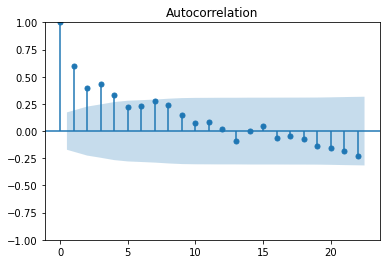

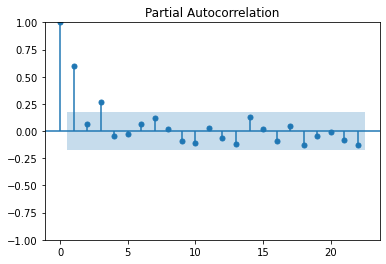

In [89]:
acf_plot = plot_acf(resid)
pacf_plot = plot_pacf(resid, method = "ywm")

In [90]:
dftest = adfuller(resid, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.212438244554491
2. P-value :  0.0013209133180149396
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -2.5835695988591976
	 5% :  -1.9433083482922873
	 10% :  -1.6148845473038977
6. Reject Null of unit root


In [91]:
dftest = adfuller(resid, autolag = "AIC", regression = "c")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.198774492235209
2. P-value :  0.02005572609969225
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -3.482920063655088
	 5% :  -2.884580323367261
	 10% :  -2.5790575441750883
6. Reject Null of unit root


In [92]:
dftest = adfuller(resid, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)
if dftest[1] <= 0.05:
    print("6. Reject Null of unit root")
else:
    print("6. Cannot reject Null of unit root")

1. ADF :  -3.1801105634323634
2. P-value :  0.0884382676341689
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -4.031882284616695
	 5% :  -3.44564246299154
	 10% :  -3.147663331295954
6. Cannot reject Null of unit root


In [93]:
kpss_test = kpss(resid, regression = "c")
if kpss_test[1] <= 0.05:
    print("Reject null of stationarity in favour of unit root")
else:
    print("Cannot reject null of stationarity in favour of unit root")

Cannot reject null of stationarity in favour of unit root


C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [94]:
#d = 0 and trend = "c"

In [96]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["c"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [97]:
cfg_list = sarima_configs()
t = time()
rel_models = []
exog = exog = np.column_stack([data["riot_dummy"], data["caa_dummy"], data["tablighi_dummy"], data["lockdown_dummy"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            if trend == "n":
                p_values_list = model_fit.pvalues[4:][:-1]
                p_values = p_values_list
            elif trend == "c" or trend == "t":
                p_values_list = model_fit.pvalues[5:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[0])
            else:
                p_values_list = model_fit.pvalues[6:][:-1]
                p_values = np.insert(p_values_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.05 for p_val in p_values]
            if len(p_vals_mask) == sum(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-447.685
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-447.685
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-455.574
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-455.253
Model > [[(0, 0, 0), (2, 0, 1, 7), 'c']]-460.247
Model > [[(0, 0, 1), (0, 0, 0, 0), 'c']]-493.313
Model > [[(0, 0, 1), (0, 0, 0, 7), 'c']]-493.313
Model > [[(0, 0, 1), (0, 0, 1, 7), 'c']]-495.721
Model > [[(0, 0, 1), (1, 0, 0, 7), 'c']]-495.270
Model > [[(0, 0, 2), (0, 0, 0, 0), 'c']]-495.449
Model > [[(0, 0, 2), (0, 0, 0, 7), 'c']]-495.449
Model > [[(0, 0, 2), (0, 0, 1, 7), 'c']]-496.439
Model > [[(0, 0, 2), (1, 0, 0, 7), 'c']]-496.131
Model > [[(0, 0, 3), (0, 0, 0, 0), 'c']]-497.396
Model > [[(0, 0, 3), (0, 0, 0, 7), 'c']]-497.396
Model > [[(0, 0, 3), (0, 0, 1, 7), 'c']]-498.026
Model > [[(0, 0, 3), (1, 0, 0, 7), 'c']]-497.618
Model > [[(0, 0, 3), (1, 0, 1, 7), 'c']]-496.350
Model > [[(1, 0, 0), (0, 0, 0, 0), 'c']]-516.859
Model > [[(1, 0, 0), (0, 0, 0, 7), 'c']]-516.859
Model > [[(1, 0, 0),

In [98]:
rel_models.sort(key = lambda tup : tup[1])
rel_models

[([(1, 0, 0), (0, 0, 0, 0), 'c'], -516.8594829322404),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -516.8594829322404),
 ([(1, 0, 0), (1, 0, 1, 7), 'c'], -514.2812411256353),
 ([(0, 0, 3), (0, 0, 1, 7), 'c'], -498.02558831562783),
 ([(0, 0, 3), (1, 0, 0, 7), 'c'], -497.61798751092294),
 ([(0, 0, 3), (0, 0, 0, 0), 'c'], -497.39564756718795),
 ([(0, 0, 3), (0, 0, 0, 7), 'c'], -497.39564756718795),
 ([(0, 0, 2), (0, 0, 1, 7), 'c'], -496.43946999037775),
 ([(0, 0, 3), (1, 0, 1, 7), 'c'], -496.3497708444493),
 ([(0, 0, 2), (1, 0, 0, 7), 'c'], -496.1312760240725),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], -495.720572391073),
 ([(0, 0, 2), (0, 0, 0, 0), 'c'], -495.44913117567387),
 ([(0, 0, 2), (0, 0, 0, 7), 'c'], -495.44913117567387),
 ([(0, 0, 1), (1, 0, 0, 7), 'c'], -495.2698079668462),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], -493.3128444803292),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], -493.3128444803292),
 ([(0, 0, 0), (2, 0, 1, 7), 'c'], -460.2473677441853),
 ([(0, 0, 0), (0, 0, 1, 7), 'c'], -455.57399584981573),
 ([

In [115]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 7), "c"]
exog = np.column_stack([data["caa_dummy"], data["tablighi_dummy"], data["scovid_dummy"]])
model = SARIMAX(endog = data["muslim_tweets_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.141984
         Iterations: 413
         Function evaluations: 640


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 278.458
Date:                Thu, 15 Sep 2022   AIC                           -544.916
Time:                        01:12:19   BIC                           -527.711
Sample:                             0   HQIC                          -537.925
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0443      0.012      3.677      0.000       0.021       0.068
x1             0.1155      0.031      3.741      0.000       0.055       0.176
x2             0.1450      0.087      1.664      0.096      -0.026       0.316
x3            -0.0870      0.049     -1.766      0.077      -0.184       0.010
ar.L1          0.6885      0.062     11.192      0.000       0.568       0.809
sigma2         0.0008   9.04e-05      8.890      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.54   Prob(JB):                         0.27
Heteroskedasticity (H):               1.16   Skew:                             0.12
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""